# Sentiment Analysis on Universal Studio Theme Park Using Python

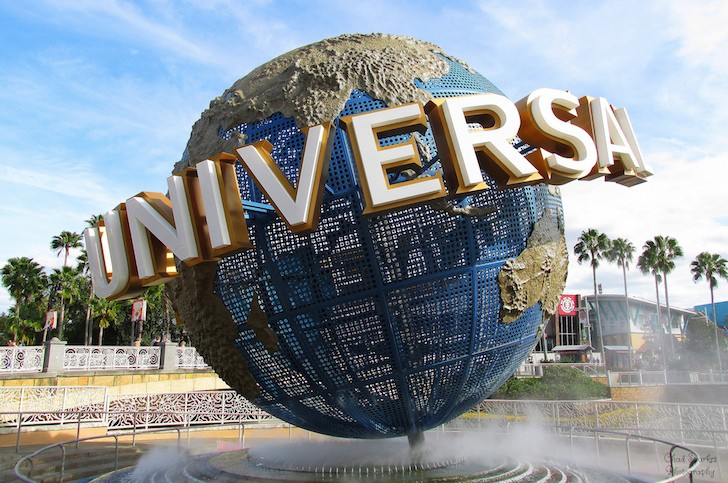

In [5]:
from IPython.display import Image
Image(filename='nbc.jpg',width=400,height=400)

In [6]:
# Extracting twitter data (tweepy + pandas)
# Importing our libraries
import tweepy           
import pandas as pd     
import numpy as np  
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# Applying your Twitter consumer_key and consumer_secret
consumer_key ='*'
consumer_secret = '*'

In [9]:
# Applying your Twitter access_token and access_token

access_token ="*"
access_secret = "*"

In [10]:
def twitter_setup():
    auth= tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token,access_secret)
    api = tweepy.API(auth)
    return api

In [11]:
# we will use Tweepy's function extractor.user_timeline(screen_name, count) to extract from screen_name's 
# user the quantity of count tweets.

In [12]:
extractor = twitter_setup()

In [20]:
tweets = extractor.user_timeline(screen_name ='UniStudios',count=300)

In [23]:
# We print the most recent 10 tweets:
print(f"Number of tweets extracted:{len(tweets)}\n")
print("10 recent tweets:\n")
for tweet in tweets[:10]:
    print(tweet.text)
    print()

Number of tweets extracted:200

10 recent tweets:

Is it too soon to be thinking about the holidays? Or should we say, Who-lidays? 🎄💚❄️ https://t.co/aXdgwFSjpQ

The final weekend of HHN is already here? Wow, time flies when you're in a constant state of paranoia and dread. 😳 https://t.co/yFChvJ0Whg

Attention, Pass Members! Have you purchased your exclusive @HorrorNights pin yet? Get yours in the Park now, just w… https://t.co/4rpN7WH8pD

RT @Cosmopolitan: Love Halloween? You could WIN a trip to experience Universal Studios’ Halloween Horror Nights 2020 in Orlando or Hollywoo…

When enjoying a trip to Springfield U.S.A., stop by Krusty Burger for one of the best burgers in town! 🍔 https://t.co/prhkkw1gRO

The curse is real! Tag the friend you always have to talk into riding Revenge of the Mummy with you. https://t.co/UKiGxPKMC1

@therealhashBot Hi Dylan, we do offer discounts on single day Military Tickets, through the Military Ticket Offices… https://t.co/Oappf8afq5

Okay, show of han

In [24]:
#Creating a (pandas) DataFrame

In [25]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweets'])

In [27]:
display(data.head(10))

,Tweets
0,Is it too soon to be thinking about the holida...
1,"The final weekend of HHN is already here? Wow,..."
2,"Attention, Pass Members! Have you purchased yo..."
3,RT @Cosmopolitan: Love Halloween? You could WI...
4,"When enjoying a trip to Springfield U.S.A., st..."
5,The curse is real! Tag the friend you always h...
6,"@therealhashBot Hi Dylan, we do offer discount..."
7,"Okay, show of hands - who wasn't ready for the..."
8,Trying to decide what to ride next... https://...
9,There’s no place like Hogwarts. https://t.co/1...


In [28]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [33]:
# Let's print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1189327306298417157
2019-10-29 23:45:01
Sprinklr
183
30
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1189327304339709954, 'id_str': '1189327304339709954', 'indices': [85, 108], 'media_url': 'http://pbs.twimg.com/media/EIFW4cjXYAI-XEB.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EIFW4cjXYAI-XEB.jpg', 'url': 'https://t.co/aXdgwFSjpQ', 'display_url': 'pic.twitter.com/aXdgwFSjpQ', 'expanded_url': 'https://twitter.com/UniStudios/status/1189327306298417157/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 1024, 'h': 683, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 454, 'resize': 'fit'}, 'large': {'w': 1024, 'h': 683, 'resize': 'fit'}}, 'features': {'medium': {'faces': []}, 'small': {'faces': []}, 'large': {'faces': []}, 'orig': {'faces': []}}}]}


In [37]:
#Adding relevant info to our dataframe

data['len']=np.array([len(tweet.text) for tweet in tweets])
data['ID']=np.array([tweet.id for tweet in tweets])
data['Date']=np.array([tweet.created_at for tweet in tweets])
data['Source']=np.array([tweet.source for tweet in tweets])
data['Likes']=np.array([tweet.favorite_count for tweet in tweets])
data['RTs']=np.array([tweet.retweet_count for tweet in tweets])


In [39]:
data.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,Is it too soon to be thinking about the holida...,108,1189327306298417157,2019-10-29 23:45:01,Sprinklr,183,30
1,"The final weekend of HHN is already here? Wow,...",138,1189302214008983552,2019-10-29 22:05:18,Twitter Web App,70,9
2,"Attention, Pass Members! Have you purchased yo...",140,1189289558967537665,2019-10-29 21:15:01,Sprinklr,40,3
3,RT @Cosmopolitan: Love Halloween? You could WI...,140,1189280098828148736,2019-10-29 20:37:25,Twitter Web App,0,5
4,"When enjoying a trip to Springfield U.S.A., st...",128,1189263251663659008,2019-10-29 19:30:29,Sprinklr,131,18


In [40]:
# basic statistics
fav_max= np.max(data['Likes'])
rt_max = np.max(data['RTs'])

In [61]:
fav = data[data.Likes== fav_max].index[0]

In [74]:
fav_max

565

In [64]:
rt=data[data['RTs']==rt_max].index[0]

In [65]:
rt

79

In [69]:
# Max Favorite
print(f"The tweet with more likes is: \n{data['Tweets'][fav]}")
print(f"Number of likes: {fav_max}")
print(f"{data['len'][fav]} characters")

The tweet with more likes is: 
Here's your first look at ALL THREE Running Universal featuring Jurassic World Finisher Medals! Want all three? Reg… https://t.co/wzFWSvsU8r
Number of likes: 565
140 characters


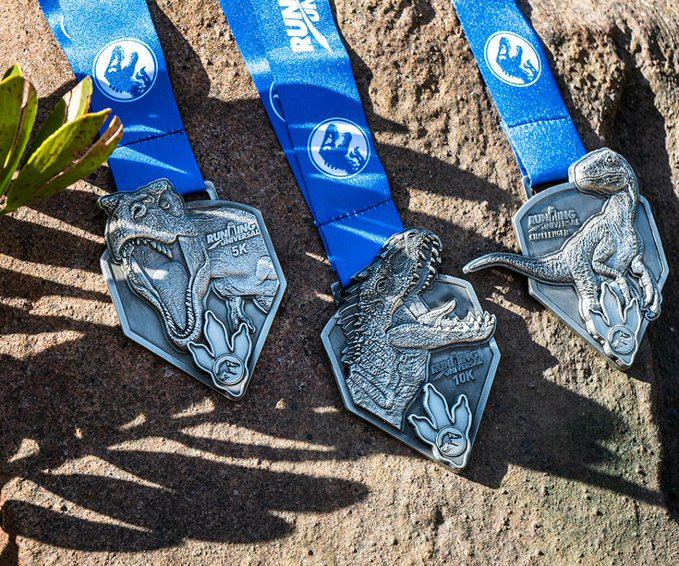

In [70]:
Image(filename='jr.jpg',width=400,height=400)

In [71]:
#Max Retweets
print(f"The tweet with more retweets is: \n{data['Tweets'][rt]}")
print(f"Number of retweets: {rt_max}")
print(f"{data['len'][rt]} characters")

The tweet with more retweets is: 
RT @ColliderVideo: The moment you have all been asking for has arrived! Watch the #ColliderLive crew take @JoshMacuga to #UniversalHHN. You…
Number of retweets: 109
140 characters


In [83]:
# Time Series
tlen= pd.Series(data=data['len'].values,index=data['Date'])

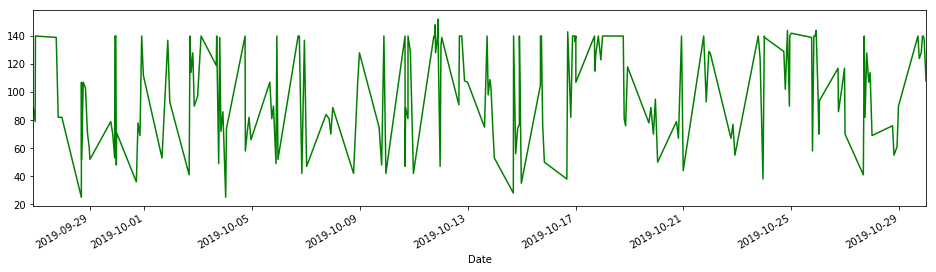

In [90]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='g');

In [92]:
tfav=pd.Series(data=data['Likes'].values,index=data['Date'])
tret=pd.Series(data=data['RTs'].values,index=data['Date'])

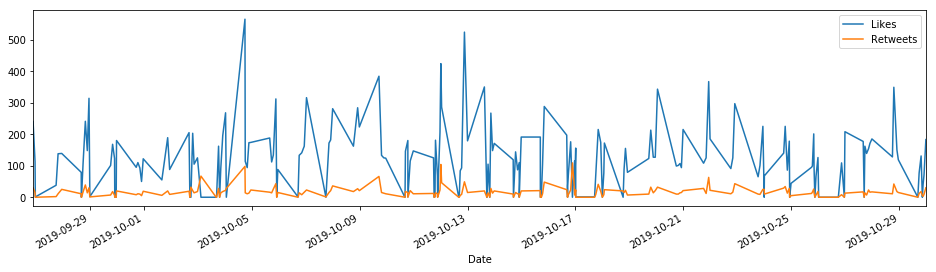

In [94]:
tfav.plot(figsize=(16,4), label='Likes',legend=True)
tret.plot(figsize=(16,4), label='Retweets',legend=True)

In [95]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

In [100]:
#Most tweets from these three devices
sources

['Sprinklr', 'Twitter Web App', 'Twitter for iPhone']

In [104]:
percent=np.zeros(len(sources))

In [105]:
percent

array([0., 0., 0.])

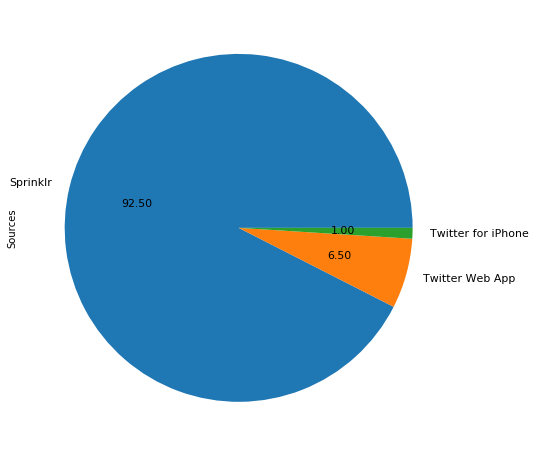

In [108]:
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart: It seems 
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(8, 8));

In [130]:
# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [131]:
analyzer = SentimentIntensityAnalyzer()

In [121]:
def clean_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [134]:
def analize_sentiment(tweet):
    analysis = analyzer.polarity_scores(clean_tweet(tweet))
    secore = analysis['compound']
    if secore >0:
        return 1
    elif secore ==0:
        return 0
    else:
        return -1

In [135]:
data['Sen_Analysis']= np.array([analize_sentiment(tweet) for tweet in data['Tweets']])

In [186]:
data['clean_message']= data['Tweets'].apply(clean_tweet)

In [188]:
data.to_csv('Universal.csv')

In [140]:
import seaborn as sns

Text(0.5, 0, 'Sentiment Analysis')

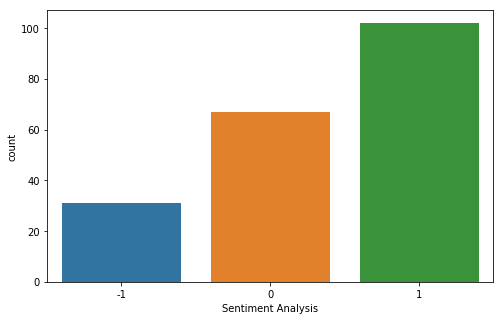

In [149]:
#1 means positive, 0# means neutral -1#means negative
plt.figure(figsize=(8,5))
sns.countplot(x='Sen_Analysis',data=data)
plt.xlabel('Sentiment Analysis')

In [153]:
#Top 10 most like positive tweets
data[data['Sen_Analysis']==1].sort_values(by='Likes',ascending=False).head(10)

,Tweets,len,ID,Date,Source,Likes,RTs,Sen_Analysis
154,Here's your first look at ALL THREE Running Un...,140,1180180793651601408,2019-10-04 18:00:02,Sprinklr,565,98,1
105,Is it too soon to be thinking about the holida...,108,1183128963478118400,2019-10-12 21:15:01,Sprinklr,524,49,1
111,Congratulations to our sister park Universal B...,133,1182812128673173505,2019-10-12 00:16:01,Sprinklr,424,104,1
9,There’s no place like Hogwarts. https://t.co/1...,55,1188896971408449537,2019-10-28 19:15:01,Sprinklr,349,42,1
45,There’s no place like Hogwarts. https://t.co/L...,55,1186760392598589440,2019-10-22 21:45:01,Sprinklr,297,43,1
84,Welcome to Jurassic World! https://t.co/KPBMMv...,50,1184201124859076609,2019-10-15 20:15:24,Sprinklr,288,48,1
110,"Attention, Pass Members! This weekend - only d...",139,1182822320378990592,2019-10-12 00:56:31,Sprinklr,286,46,1
133,Is it too soon to be thinking about the holida...,108,1181694510876811270,2019-10-08 22:15:00,Sprinklr,284,27,1
135,What's your favorite part of The Wizarding Wor...,89,1181358656119590912,2019-10-08 00:00:26,Sprinklr,281,36,1
199,What's your favorite part of The Wizarding Wor...,89,1177334643869257734,2019-09-26 21:30:27,Sprinklr,240,30,1


In [177]:
#Consumers like this tweet 
data['Tweets'].iloc[154]

"Here's your first look at ALL THREE Running Universal featuring Jurassic World Finisher Medals! Want all three? Reg… https://t.co/wzFWSvsU8r"

In [175]:
# Top 10 neutral tweets
data[data['Sen_Analysis']==0].sort_values(by='Likes').head(10)

,Tweets,len,ID,Date,Source,Likes,RTs,Sen_Analysis
6,"@therealhashBot Hi Dylan, we do offer discount...",140,1189219091296538628,2019-10-29 16:35:00,Sprinklr,0,0,0
192,@vegasmom728 Hi Jill. Accessible Parking space...,107,1177982916598665217,2019-09-28 16:26:27,Sprinklr,0,0,0
167,RT @SpiritHalloween: Be the Gatekeeper this #H...,114,1179454695368060928,2019-10-02 17:54:47,Twitter Web App,0,32,0
162,@anthonyrpalma Hello Anthony! In order to qual...,119,1179793734373953538,2019-10-03 16:22:00,Sprinklr,0,0,0
155,RT @HorrorNights: Now these guys have potentia...,74,1179930632958304257,2019-10-04 01:25:59,Twitter Web App,0,28,0
138,@cescbe Isla Nubar is open during HHN! Moes Ta...,84,1181268200052461569,2019-10-07 18:01:00,Sprinklr,0,1,0
119,@smoochimochichi Hi Carol!\nAir masks will be ...,140,1182721373979971591,2019-10-11 18:15:24,Sprinklr,0,0,0
82,@shhbrii Discounts actually vary from night to...,140,1184514219028439040,2019-10-16 16:59:31,Sprinklr,0,0,0
79,RT @ColliderVideo: The moment you have all bee...,140,1184579682848645121,2019-10-16 21:19:39,Twitter Web App,0,109,0
68,@HorrorNolan While we expect the refurbishment...,140,1184981523910529025,2019-10-17 23:56:25,Sprinklr,0,0,0


In [178]:
#Neutral tweeet
data['Tweets'].iloc[6]

'@therealhashBot Hi Dylan, we do offer discounts on single day Military Tickets, through the Military Ticket Offices… https://t.co/Oappf8afq5'

In [179]:
# Top 10 Negative tweets
data[data['Sen_Analysis']==-1].sort_values(by='Likes').head(10)

,Tweets,len,ID,Date,Source,Likes,RTs,Sen_Analysis
163,"RT @nowthisnews: You can step inside ‘Us,’ ‘Gh...",140,1179589812711411713,2019-10-03 02:51:41,Twitter Web App,0,67,-1
159,@TGbaldr Hello Julien! If you have a Park tick...,139,1179840291941036032,2019-10-03 19:27:00,Sprinklr,0,0,-1
127,@BrittanyWoolsey Hello Brittany! If you have a...,140,1182329062901063685,2019-10-10 16:16:29,Sprinklr,0,0,-1
108,@OGoofster Hi there! Tickets are non-refundabl...,140,1183059624389468160,2019-10-12 16:39:29,Sprinklr,1,0,-1
182,@SparxDMJ Hello! We apologize for any confusio...,140,1178431994876829696,2019-09-29 22:10:56,Sprinklr,1,0,-1
69,@HorrorNolan Hi Nolan!\n\nThe hours for Hallow...,140,1184980281196994561,2019-10-17 23:51:29,Sprinklr,2,0,-1
77,@HorrorNights JUST ANNOUNCED – Frequent Fear P...,136,1184610180454989824,2019-10-16 23:20:50,Twitter Web App,36,7,-1
28,"Attention, Annual Pass Members &amp; Frequent ...",144,1187851347380580358,2019-10-25 22:00:05,Sprinklr,66,7,-1
40,Another totally wicked new churro is coming to...,139,1187158026739965952,2019-10-24 00:05:04,Sprinklr,68,10,-1
1,"The final weekend of HHN is already here? Wow,...",138,1189302214008983552,2019-10-29 22:05:18,Twitter Web App,70,9,-1


In [184]:
data['Tweets'].iloc[108]

'@OGoofster Hi there! Tickets are non-refundable, and we do not have the ability to transfer tickets between locatio… https://t.co/9OZDtWv5zi'

In [ ]:
#Conclusion: more positive tweets in Universal studio account.